## AICP Internship Task

Anomaly detection in transactions means identifying unusual or unexpected patterns within
transactions or related activities. These patterns, known as anomalies or outliers, deviate
significantly from the expected norm and could indicate irregular or fraudulent behavior.

Anomaly detection plays a crucial role in various businesses, especially those dealing with
financial transactions, online activities, and security-sensitive operations.

We can follow a systematic process to address the challenge of anomaly detection. We can
begin by collecting and preparing transaction data, ensuring its accuracy and consistency. Then,
we can find patterns in the data to find anomalies and use specialized anomaly detection
algorithms like isolation forest to detect anomalies.


Find the Dataset __“transaction_anomalies_dataset.csv”__.


The dataset contains information about various financial transactions, each represented by
several features:

- __Transaction_ID:__ Unique identifier for each transaction.
- **Transaction_Amount:** The monetary value of the transaction.
- **Transaction_Volume:** The quantity or number of items/actions involved in the transaction.
- **Average_Transaction_Amount:** The historical average transaction amount for the account.
- **Frequency_of_Transactions:** How often transactions are typically performed by the account.
- **Time_Since_Last_Transaction:** Time elapsed since the last transaction.
- **Day_of_Week:** The day of the week when the transaction occurred.
- **Time_of_Day:** The time of day when the transaction occurred.
- **Age:** Age of the account holder.
- **Gender:** Gender of the account holder.
- **Income:** Income of the account holder.
- **Account_Type:** Type of account (e.g., personal, business).


## Q1

 Import data and check null values, check column info and the descriptive statistics of the data.


In [73]:
# importing Pandas Library
import pandas as pd

In [74]:
# Importing Excel file as dataset
dataset = pd.read_csv("transaction_anomalies_dataset.csv")

In [75]:
# reading first 10 indexes of dataset
dataset.head(10)

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings
5,TX5,969.987307,1,1018.948796,6,20,Thursday,14:00,24,Male,872843,Savings
6,TX6,973.317560,2,999.889443,5,4,Tuesday,07:00,21,Male,1105889,Savings
7,TX7,931.103035,4,992.937667,10,29,Sunday,17:00,43,Male,502283,Savings
8,TX8,1036.923329,4,1003.427366,18,23,Thursday,07:00,38,Female,323247,Savings
9,TX9,1013.174302,4,1032.835422,14,25,Thursday,12:00,58,Female,1278732,Current


In [76]:
# Checking for null values
null_values = dataset.isnull()

In [77]:
# printing null values
print("Null Values are :\n", null_values)

Null Values are :
      Transaction_ID  Transaction_Amount  Transaction_Volume  \
0             False               False               False   
1             False               False               False   
2             False               False               False   
3             False               False               False   
4             False               False               False   
..              ...                 ...                 ...   
995           False               False               False   
996           False               False               False   
997           False               False               False   
998           False               False               False   
999           False               False               False   

     Average_Transaction_Amount  Frequency_of_Transactions  \
0                         False                      False   
1                         False                      False   
2                         False       

In [78]:
# printing sum of all the null values
null_values.sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [79]:
# checking column information
column_info = dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [80]:
# calculating descriptive satistics
statistics = dataset.describe()

In [81]:
# displaying satistics
print("Descriptive statistics of the Dataset is : \n", statistics)

Descriptive statistics of the Dataset is : 
        Transaction_Amount  Transaction_Volume  Average_Transaction_Amount  \
count         1000.000000         1000.000000                 1000.000000   
mean          1038.122511            2.498000                 1000.682506   
std            283.580055            1.115006                   20.632334   
min            849.024392            1.000000                  939.081423   
25%            966.028796            1.000000                  986.800556   
50%           1002.118678            3.000000                 1000.501902   
75%           1033.143657            3.000000                 1015.155595   
max           3227.459108            4.000000                 1073.154036   

       Frequency_of_Transactions  Time_Since_Last_Transaction          Age  \
count                1000.000000                  1000.000000  1000.000000   
mean                   12.078000                    15.341000    40.641000   
std                     4.2

## Q2

Check distribution of transactions amount in the data

In [82]:
# importing Matplotlib to draw graphs
import matplotlib.pyplot as plt

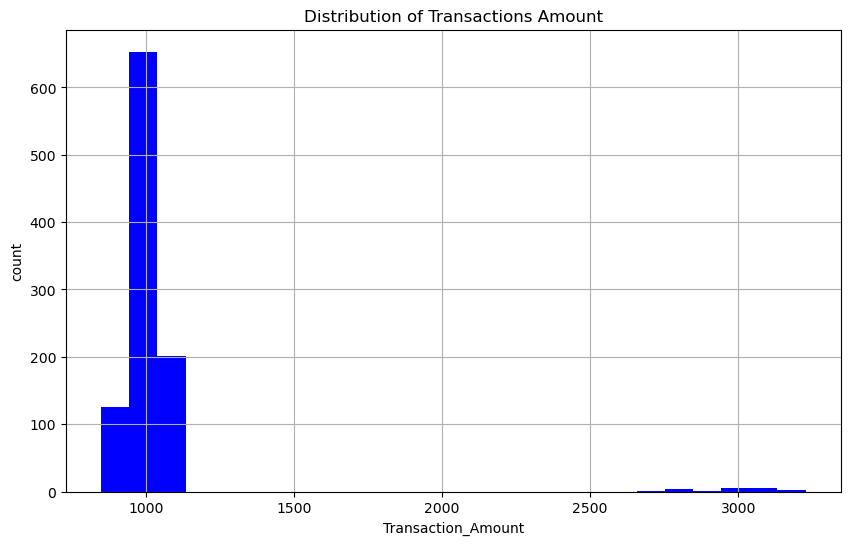

In [83]:
#ploting graph

plt.figure(figsize = (10, 6))                                        # size of graph
plt.hist(dataset['Transaction_Amount'], bins = 25, color = 'blue')   # ploting graph of type hist 
plt.title('Distribution of Transactions Amount')                     # title of the graph
plt.xlabel('Transaction_Amount')                                     # x-axis label
plt.ylabel('count')                                                  # y-axis label
plt.grid(True)                                                       # griding
plt.show()                                                           # displaying graph

## Q3

 Check distribution of transactions amount by account type


In [84]:
# importing statistical data visualization library
import seaborn as sns

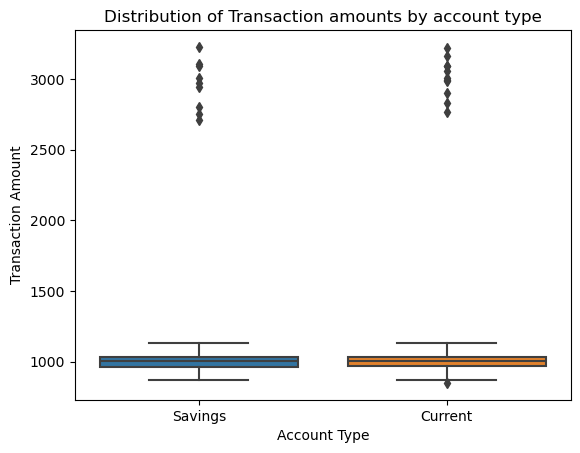

In [85]:
sns.boxplot(x = 'Account_Type' , y = 'Transaction_Amount', data = dataset)     # graph type and values
plt.title('Distribution of Transaction amounts by account type')               # Title of the graph
plt.xlabel('Account Type')                                                     # parameters of x-axis
plt.ylabel('Transaction Amount')                                               # parameters of y-axis
plt.show()                                                                     # declaration of the graph

## Q4

Check the average transaction amount by age.

In [108]:
# calculting average transaction amount per age
average_transaction_by_age = dataset.groupby('Age')['Transaction_Amount'].mean().reset_index() 

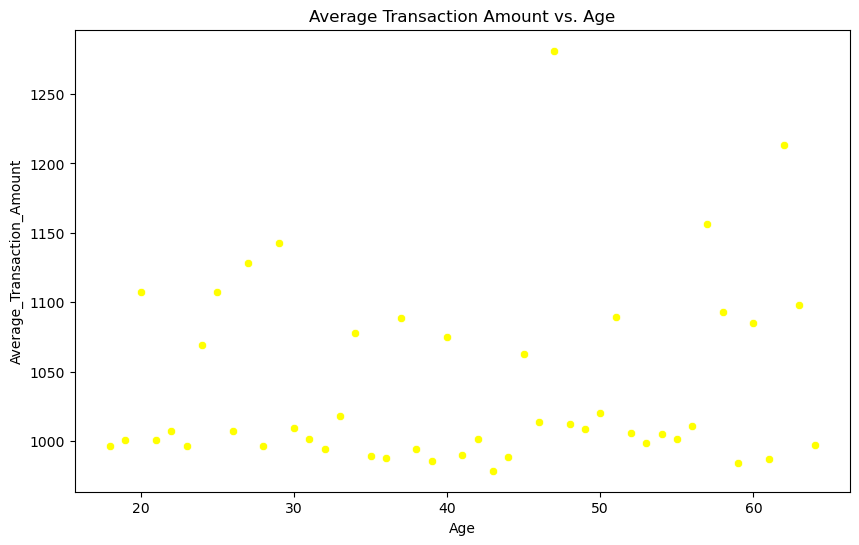

In [106]:
plt.figure(figsize = (10, 6))                            # size of the graph

# defining plot type, x and y values, color and size of the scatterd dots
sns.scatterplot(x = 'Age', y = 'Transaction_Amount', data = average_transaction_by_age, color = 'yellow', alpha = 1)

plt.title('Average Transaction Amount vs. Age')          # title of the graph
plt.xlabel('Age')                                        # x axis coordinates 
plt.ylabel('Average_Transaction_Amount')                 # x axis coordinates   
plt.show()                                               # displaying graph

## Q5

 Check the count of transactions by day of the week

In [109]:
# calculating amount of transaction per day
transaction_by_day = dataset.groupby('Day_of_Week')['Transaction_ID'].count().reset_index(name = 'Transaction_count')

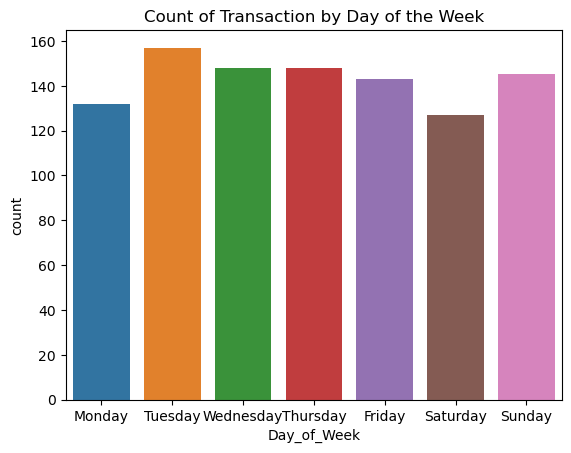

In [110]:
# ploting bar graph with days mentioned as x axis coordinates and counting as y axis coordinate
sns.barplot(x = 'Day_of_Week', y = 'Transaction_count', data = transaction_by_day, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.title('Count of Transaction by Day of the Week')            # title of the graph
plt.xlabel('Day_of_Week')                                       # x axis label
plt.ylabel('count')                                             # y axis label
plt.show()                                                      # displaying graph

## Q6

Check the correlation between all the columns in the data

In [111]:
# selecting only the numerical columns to find coorelation
numerical_columns = dataset.select_dtypes(include = ['float64','int64'])

In [112]:
# calculate the coorelation Matrix
coorelation = numerical_columns.corr()

In [113]:
# Filling the NaN values with the mean of each column
fill_nan = numerical_columns.fillna(numerical_columns.mean())

In [114]:
# calculating coorelation matrix on the  filled DataFrame
coorelation = fill_nan.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Transaction_Amount'),
  Text(1.5, 0, 'Transaction_Volume'),
  Text(2.5, 0, 'Average_Transaction_Amount'),
  Text(3.5, 0, 'Frequency_of_Transactions'),
  Text(4.5, 0, 'Time_Since_Last_Transaction'),
  Text(5.5, 0, 'Age'),
  Text(6.5, 0, 'Income')])

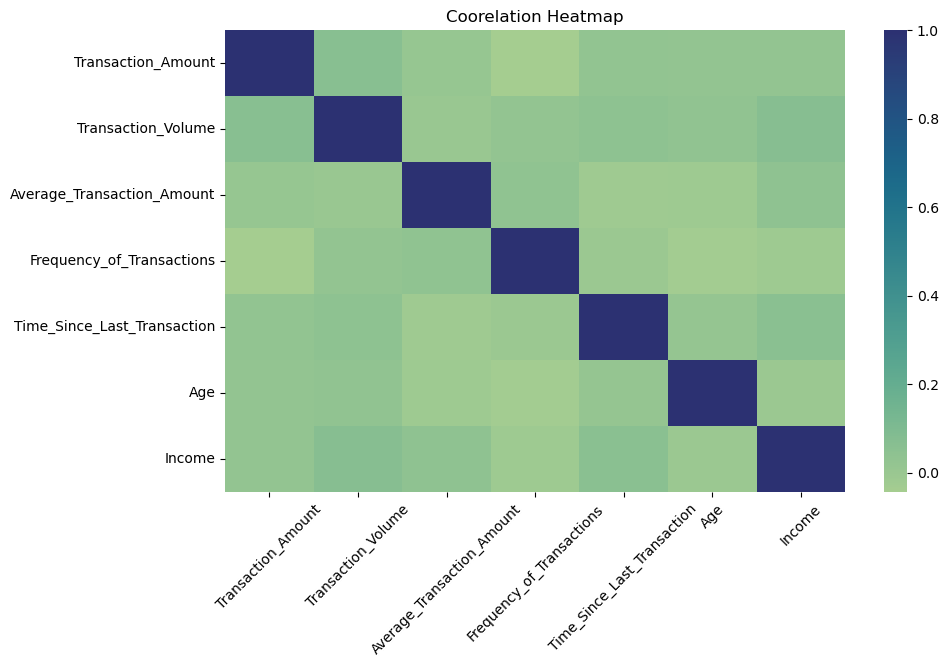

In [115]:
plt.figure(figsize = (10, 6))                                       # figure size

#generating graph of heatmap 
sns.heatmap(coorelation, cmap = 'crest',fmt = ".2f")

plt.title('Coorelation Heatmap')                                    # Title of graph
plt.xticks(rotation = 45)                                           # rotates x axis labels for better readability

## Q7

Visualize anomalies in the data

In [116]:
from sklearn.ensemble import IsolationForest

In [117]:
import numpy as np

In [172]:
anomaly_columns = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

In [173]:
model = IsolationForest(n_estimators = 100, contamination = 0.01)

In [174]:
dataset['Anomaly_score'] = model.fit_predict(dataset[anomaly_columns])

In [175]:
dataset['Anomaly_or_not'] = dataset['Anomaly_score'] == -1

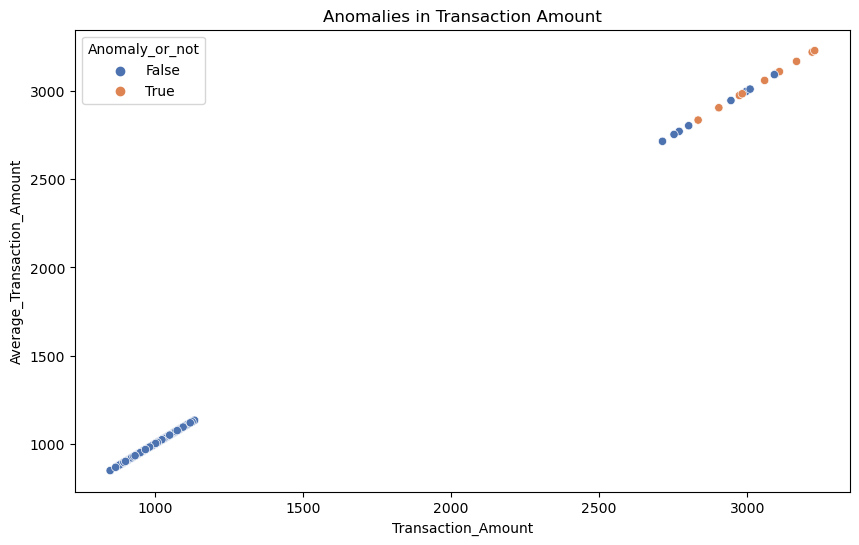

In [176]:
plt.figure(figsize = (10, 6), dpi = 100)
sns.scatterplot(data = dataset, x = 'Transaction_Amount', y = 'Transaction_Amount', hue = 'Anomaly_or_not', palette = 'deep')
sns.color_palette("Paired")
plt.title('Anomalies in Transaction Amount')
plt.xlabel('Transaction_Amount')
plt.ylabel('Average_Transaction_Amount')
plt.show()

## Q8 

Calculate the number of anomalies in the data to find the ratio of anomalies in the data,
which will be useful while using anomaly detection algorithms like isolation forest.

In [178]:
number_of_anomalies = dataset['Anomaly_or_not'].sum()            # calculating total number of anamolies
total_observations = len(dataset)                                # total observations done on dataset
ratio_of_anomalies = number_of_anomalies/total_observations      # calculting ratio of calculated anamolies

In [179]:
# printing
print(f"Number of Anomalies :{number_of_anomalies}")             
print(f"Total_observations : {total_observations}")
print(f"Ration_of_anomalies : {ratio_of_anomalies:.3f}")

Number of Anomalies :10
Total_observations : 1000
Ration_of_anomalies : 0.010


## Q9

Select the relevant features and fit them into the Machine Learning model “isolation
forest” for detecting anomalies. Now get the prediction and convert into binary values.


In [125]:
# selecting the numerical valus that can help in predicting anamolies
features = ['Transaction_Amount', 'Transaction_Volume', 'Average_Transaction_Amount', 'Frequency_of_Transactions']
data = dataset[features]

In [126]:
# using IsolationForest to create model
model = IsolationForest(n_estimators = 100, contamination = 0.01, random_state = 42)
model.fit(data)

IsolationForest(contamination=0.01, random_state=42)

In [127]:
# predicting with the help of model
predictions = model.predict(data)

In [150]:
# converting predictions to binary values i.e 0 and 1
binary_predictions = np.where(predictions == 1,0,1)

In [180]:
# creating column for storing Anamoly_Predicions
dataset['Anomaly_Prediction'] = binary_predictions

In [181]:
# Printing excel sheet's 1st 20 columns 
print(dataset.head(20))

   Transaction_ID  Transaction_Amount  Transaction_Volume  \
0             TX0         1024.835708                   3   
1             TX1         1013.952065                   4   
2             TX2          970.956093                   1   
3             TX3         1040.822254                   2   
4             TX4          998.777241                   1   
5             TX5          969.987307                   1   
6             TX6          973.317560                   2   
7             TX7          931.103035                   4   
8             TX8         1036.923329                   4   
9             TX9         1013.174302                   4   
10           TX10          966.153900                   4   
11           TX11         1023.802129                   2   
12           TX12          955.183241                   3   
13           TX13          897.778849                   3   
14           TX14          998.208698                   1   
15           TX15       

In [182]:
print(dataset.head())
print(dataset.columns)

  Transaction_ID  Transaction_Amount  Transaction_Volume  \
0            TX0         1024.835708                   3   
1            TX1         1013.952065                   4   
2            TX2          970.956093                   1   
3            TX3         1040.822254                   2   
4            TX4          998.777241                   1   

   Average_Transaction_Amount  Frequency_of_Transactions  \
0                  997.234714                         12   
1                 1020.210306                          7   
2                  989.496604                          5   
3                  969.522480                         16   
4                 1007.111026                          7   

   Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender   Income  \
0                           29      Friday       06:00   36    Male  1436074   
1                           22      Friday       01:00   41  Female   627069   
2                           12     Tue

In [154]:
limit = 10000

In [155]:
dataset['True_label'] = 0

In [156]:
dataset.loc[dataset['Transaction_Amount'] > limit, 'True_label'] = 1

In [157]:
features = dataset[['Transaction_Amount', 'Transaction_Volume']]

In [158]:
features.fillna(features.median(), inplace = True)

C:\Users\Saddu\AppData\Local\Temp\ipykernel_2420\460100900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.median(), inplace = True)


In [159]:
model = IsolationForest(random_state = 42)

In [160]:
model.fit(features.values)

IsolationForest(random_state=42)

In [161]:
prediction = model.predict(features.values)
dataset['binary_predictions'] = np.where(predictions == -1, 1, 0)

## Q10

Show the classification report

In [168]:
from sklearn.metrics import classification_report

In [188]:
true_labels = dataset['True_label']
binary_predictions = dataset['binary_predictions']

In [183]:
report = classification_report(true_labels, binary_predictions, target_names = ['Normal', 'Anomaly'])

C:\Users\Saddu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saddu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Saddu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
print(report)

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99      1000
     Anamoly       0.00      0.00      0.00         0

    accuracy                           0.99      1000
   macro avg       0.50      0.49      0.50      1000
weighted avg       1.00      0.99      0.99      1000



## Q11



 Use the trained model to detect anomalies to bring following result.

In [184]:
num_anomalies = dataset['Anomaly_Prediction'].sum()
total_transactions = len(dataset)
percentage_anomalies = (num_anomalies / total_transactions) * 100

In [185]:
print(f"Number of anomalies detected: {num_anomalies}")
print(f"Total number of Transactions: {total_transactions}")
print(f"Percentage of transactions classified as anomalies: {percentage_anomalies:.3f}%")

Number of anomalies detected: 10
Total number of Transactions: 1000
Percentage of transactions classified as anomalies: 1.000%


In [187]:
print("\n Sample of transactions classified as anomalies: ")
print(dataset[dataset['Anomaly_Prediction'] == 1].head())


 Sample of transactions classified as anomalies: 
    Transaction_ID  Transaction_Amount  Transaction_Volume  \
188          TX188         3094.817415                   3   
307          TX307         3058.483023                   3   
422          TX422         3218.959781                   1   
484          TX484         3166.250653                   4   
550          TX550         3227.459108                   4   

     Average_Transaction_Amount  Frequency_of_Transactions  \
188                  980.424667                          6   
307                  984.552604                          5   
422                  965.597949                         15   
484                 1011.935656                         18   
550                 1012.042366                          7   

     Time_Since_Last_Transaction Day_of_Week Time_of_Day  Age  Gender  \
188                           10      Sunday       11:00   57  Female   
307                            4      Monday       19:00 